Common hours between IMIS and MODIS data: {'12:00', '11:00', '14:00', '13:00'}
Processing hour: 12:00
Processed IMIS data for hour 12:00:
      Trend Station
0  0.053091    AMD2
1  0.040521    ANV2
2  0.022751    ANV3
3  0.040522    ARO2
4  0.055735    ARO3


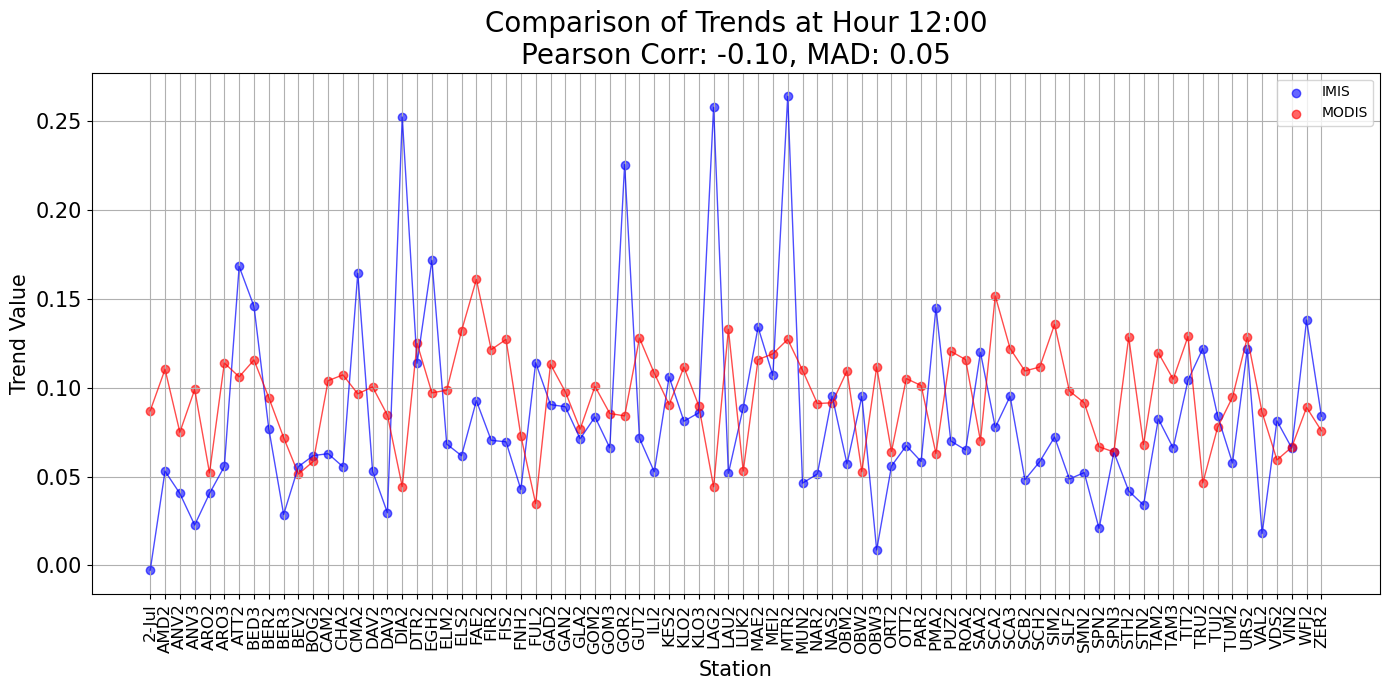

Processing hour: 11:00
Processed IMIS data for hour 11:00:
      Trend Station
0  0.052799    AMD2
1  0.042326    ANV2
2  0.026037    ANV3
3  0.040108    ARO2
4  0.059966    ARO3


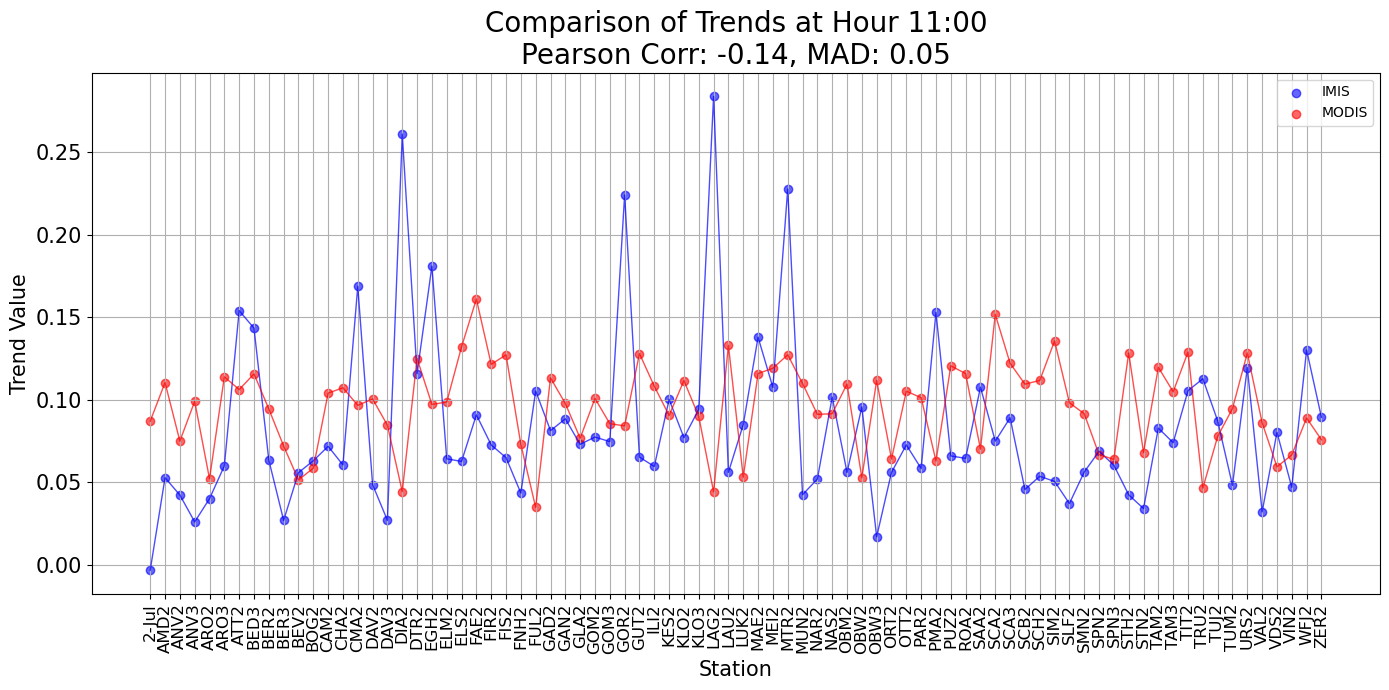

Processing hour: 14:00
Processed IMIS data for hour 14:00:
      Trend Station
0  0.052889    AMD2
1  0.029631    ANV2
2  0.016597    ANV3
3  0.042512    ARO2
4  0.049255    ARO3


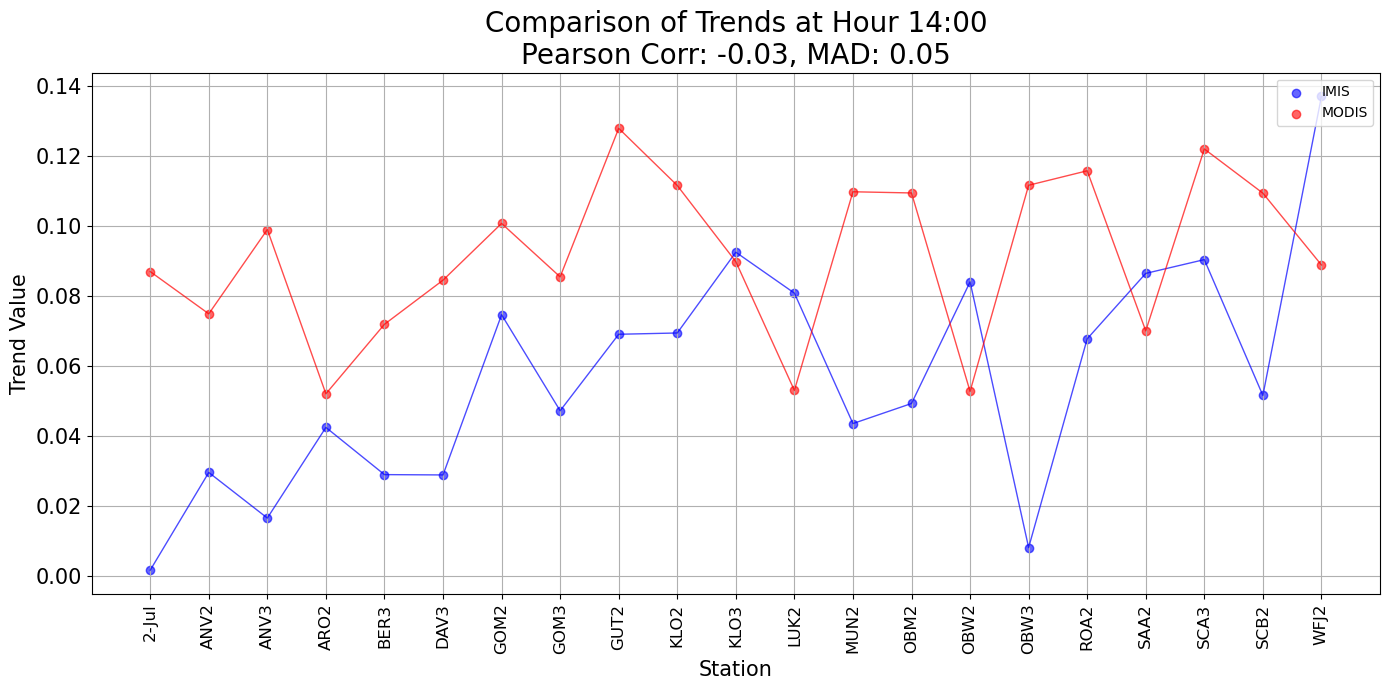

Processing hour: 13:00
Processed IMIS data for hour 13:00:
      Trend Station
0  0.052343    AMD2
1  0.037558    ANV2
2  0.020940    ANV3
3  0.040417    ARO2
4  0.051959    ARO3


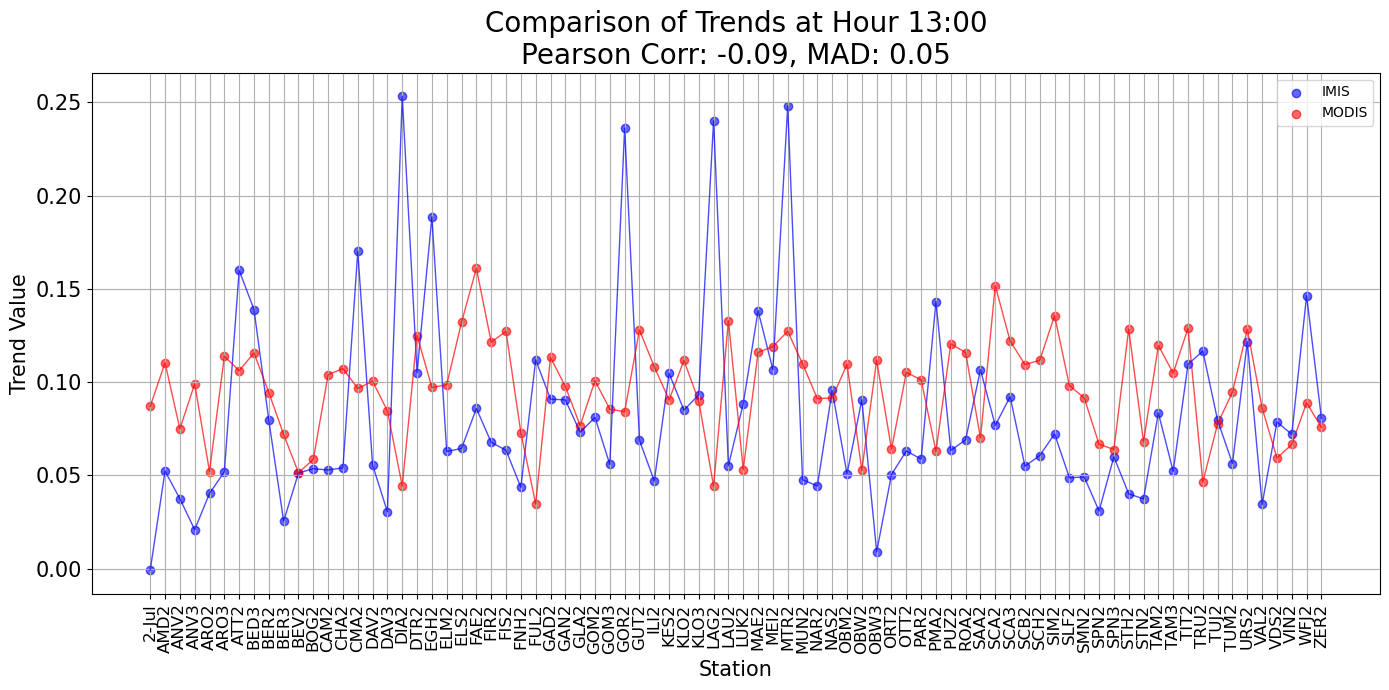

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, linregress

# Paths to the IMIS and MODIS trend data
imis_path = r'E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\new_hourly_trends_new_code.csv'
modis_path = r'E:\all folders\STUDIES\UZH\master thesis\MODIS DATA\Actual Data\MYD21A1D\Filtered_Data\mean_temperature_trends_by_hour.csv'

# Load the data from both files
imis_data = pd.read_csv(imis_path)
modis_data = pd.read_csv(modis_path)

# Convert 'Hour' in MODIS data to match the format in IMIS columns (e.g., '0:00')
modis_data['Hour'] = modis_data['Hour'].apply(lambda x: f"{int(x):02}:00")

# Verify common hours between the datasets
common_hours = set(modis_data['Hour'].unique()) & set(imis_data.columns)
print("Common hours between IMIS and MODIS data:", common_hours)

# Iterate through each common hour to create individual figures
for hour in common_hours:
    print(f"Processing hour: {hour}")

    # Extract IMIS data for the current hour
    current_hour_imis = imis_data[['Time', hour]].copy()
    if 'Time' in current_hour_imis[hour].values:
        print(f"Warning: 'Time' found in the data for hour {hour}")
        current_hour_imis = current_hour_imis[current_hour_imis[hour] != 'Time']
    current_hour_imis = current_hour_imis.rename(columns={hour: 'Trend'})
    current_hour_imis['Station'] = current_hour_imis['Time']
    current_hour_imis = current_hour_imis.drop(columns=['Time'])

    # Verify the processed data for this hour
    print(f"Processed IMIS data for hour {hour}:")
    print(current_hour_imis.head())

    # Filter MODIS data for the current hour
    current_hour_modis = modis_data[modis_data['Hour'] == hour][['Station', 'SlopePerYear']]
    current_hour_modis = current_hour_modis.rename(columns={'SlopePerYear': 'Trend'})

    # Merge the IMIS and MODIS data based on the station name
    merged_data = pd.merge(current_hour_imis, current_hour_modis, on='Station', suffixes=('_IMIS', '_MODIS'), how='outer')

    # Filter out rows with NaN values in either column for Pearson correlation and MAD
    valid_data = merged_data.dropna(subset=['Trend_IMIS', 'Trend_MODIS'])

    if not valid_data.empty:
        # Calculate Pearson correlation and MAD
        pearson_corr, _ = pearsonr(valid_data['Trend_IMIS'], valid_data['Trend_MODIS'])
        mad = np.mean(np.abs(valid_data['Trend_IMIS'] - valid_data['Trend_MODIS']))

        # Calculate the linear regression slope
        slope, intercept = linregress(valid_data['Trend_IMIS'], valid_data['Trend_MODIS'])[:2]

        # Sort data by 'Station' for connecting points smoothly
        valid_data = valid_data.sort_values(by='Station')

        # Create the plot
        plt.figure(figsize=(14, 7))

        # Plot IMIS data with scatter and line
        plt.scatter(valid_data['Station'], valid_data['Trend_IMIS'], color='blue', label='IMIS', alpha=0.6)
        plt.plot(valid_data['Station'], valid_data['Trend_IMIS'], color='blue', linestyle='-', linewidth=1, alpha=0.7)

        # Plot MODIS data with scatter and line
        plt.scatter(valid_data['Station'], valid_data['Trend_MODIS'], color='red', label='MODIS', alpha=0.6)
        plt.plot(valid_data['Station'], valid_data['Trend_MODIS'], color='red', linestyle='-', linewidth=1, alpha=0.7)

        # Add labels, title, and correlation/MAD text
        plt.xlabel('Station',fontsize=15)
        plt.ylabel('Trend Value',fontsize=15)
        plt.title(f'Comparison of Trends at Hour {hour}\nPearson Corr: {pearson_corr:.2f}, MAD: {mad:.2f}',fontsize=20)

        

        plt.xticks(rotation=90,fontsize=12)
        plt.yticks(fontsize=15)
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.tight_layout()

        # Save the figure
        plt.savefig(f'comparison_hour_{hour}.png')
        plt.show()
    else:
        print(f"No valid data available for hour {hour}")



Common hours between IMIS and MODIS data: {'10:00', '11:00', '12:00'}
Processing hour: 10:00
Processed IMIS data for hour 10:00:
      Trend Station
0  0.056164    AMD2
1  0.042179    ANV2
2  0.033347    ANV3
3  0.040355    ARO2
4  0.066290    ARO3


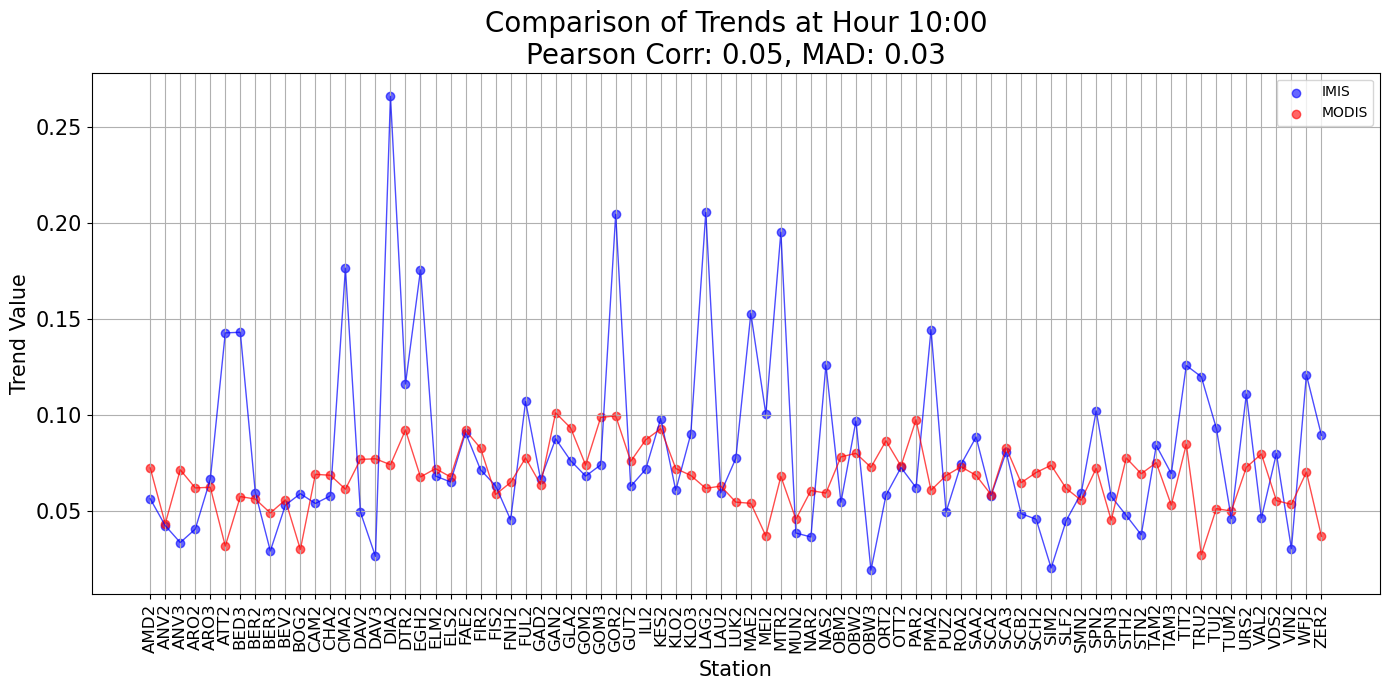

Processing hour: 11:00
Processed IMIS data for hour 11:00:
      Trend Station
0  0.052799    AMD2
1  0.042326    ANV2
2  0.026037    ANV3
3  0.040108    ARO2
4  0.059966    ARO3


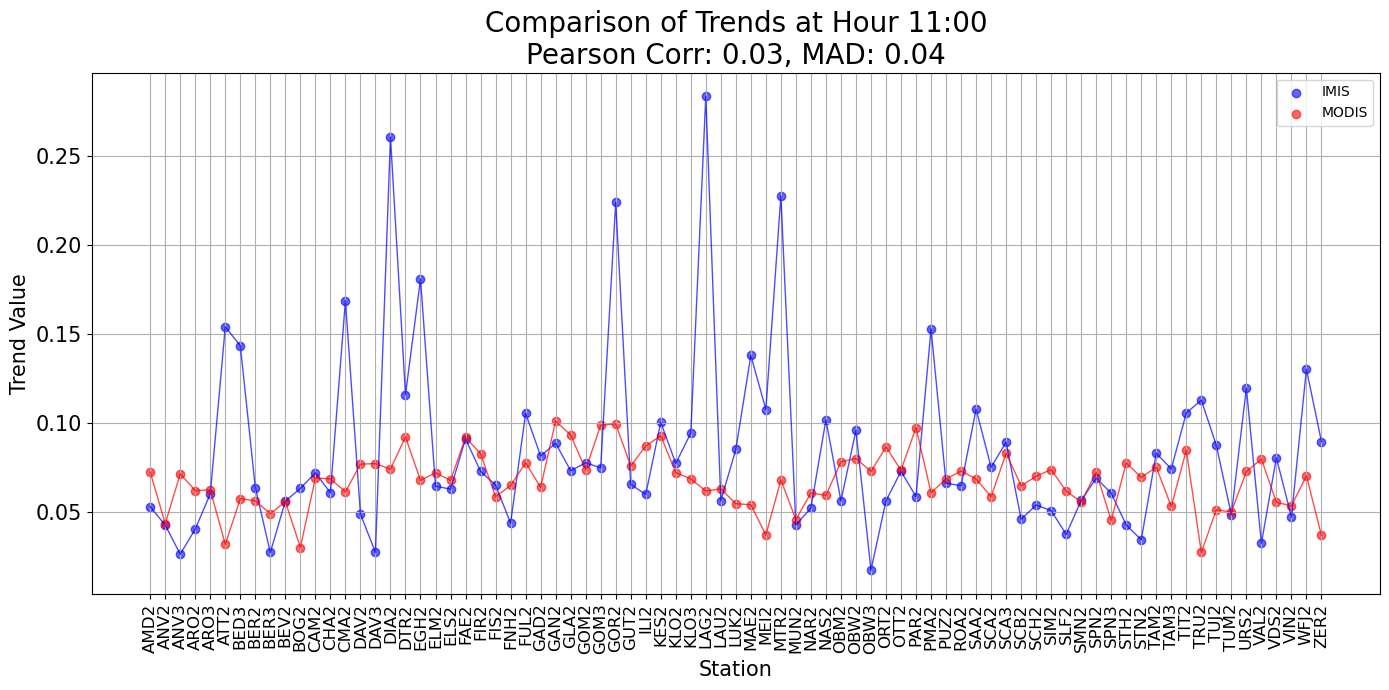

Processing hour: 12:00
Processed IMIS data for hour 12:00:
      Trend Station
0  0.053091    AMD2
1  0.040521    ANV2
2  0.022751    ANV3
3  0.040522    ARO2
4  0.055735    ARO3


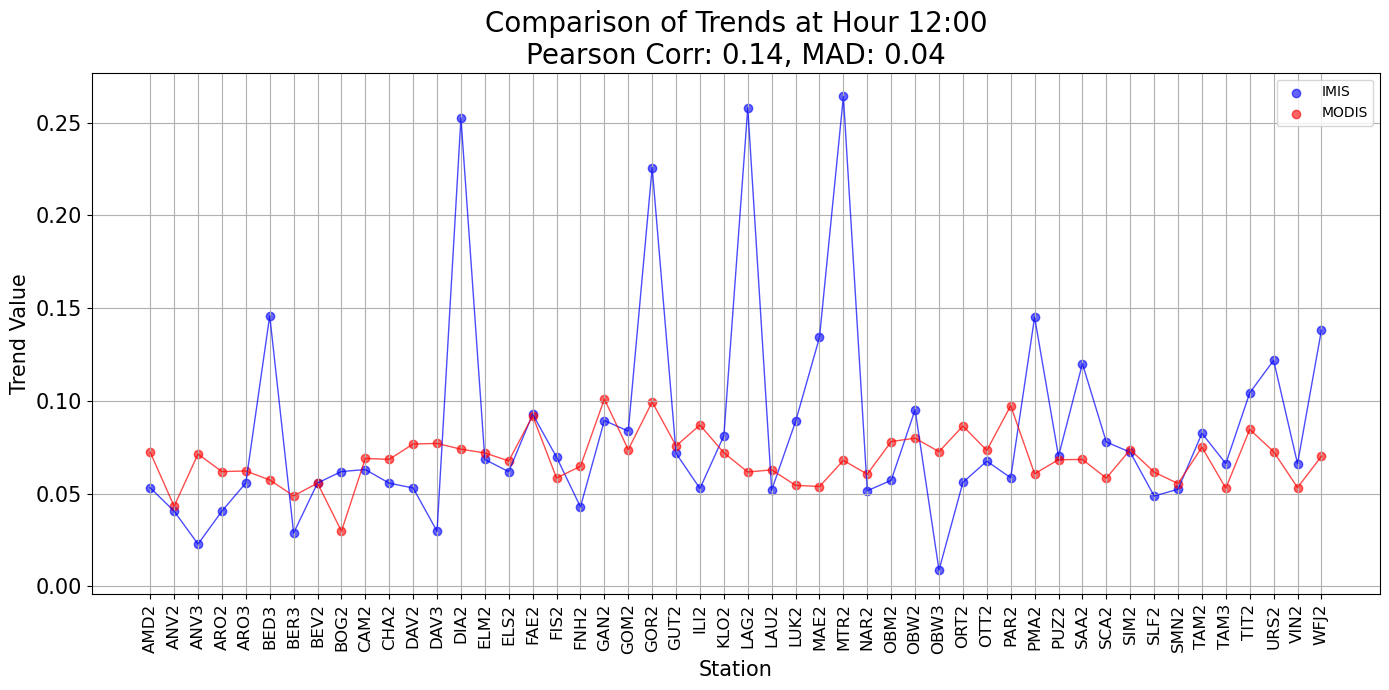

In [91]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, linregress

# Paths to the IMIS and MODIS trend data
imis_path = r'E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\new_hourly_trends_new_code.csv'
modis_path = r'E:\all folders\STUDIES\UZH\master thesis\MODIS DATA\Actual Data\MOD21A1D\Filtered_Data\mean_temperature_trends_by_hour.csv'

# Load the data from both files
imis_data = pd.read_csv(imis_path)
modis_data = pd.read_csv(modis_path)

# Convert 'Hour' in MODIS data to match the format in IMIS columns (e.g., '0:00')
modis_data['Hour'] = modis_data['Hour'].apply(lambda x: f"{int(x):02}:00")

# Verify common hours between the datasets
common_hours = set(modis_data['Hour'].unique()) & set(imis_data.columns)
print("Common hours between IMIS and MODIS data:", common_hours)

# Iterate through each common hour to create individual figures
for hour in common_hours:
    print(f"Processing hour: {hour}")

    # Extract IMIS data for the current hour
    current_hour_imis = imis_data[['Time', hour]].copy()
    if 'Time' in current_hour_imis[hour].values:
        print(f"Warning: 'Time' found in the data for hour {hour}")
        current_hour_imis = current_hour_imis[current_hour_imis[hour] != 'Time']
    current_hour_imis = current_hour_imis.rename(columns={hour: 'Trend'})
    current_hour_imis['Station'] = current_hour_imis['Time']
    current_hour_imis = current_hour_imis.drop(columns=['Time'])

    # Verify the processed data for this hour
    print(f"Processed IMIS data for hour {hour}:")
    print(current_hour_imis.head())

    # Filter MODIS data for the current hour
    current_hour_modis = modis_data[modis_data['Hour'] == hour][['Station', 'SlopePerYear']]
    current_hour_modis = current_hour_modis.rename(columns={'SlopePerYear': 'Trend'})

    # Merge the IMIS and MODIS data based on the station name
    merged_data = pd.merge(current_hour_imis, current_hour_modis, on='Station', suffixes=('_IMIS', '_MODIS'), how='outer')

    # Filter out rows with NaN values in either column for Pearson correlation and MAD
    valid_data = merged_data.dropna(subset=['Trend_IMIS', 'Trend_MODIS'])

    if not valid_data.empty:
        # Calculate Pearson correlation and MAD
        pearson_corr, _ = pearsonr(valid_data['Trend_IMIS'], valid_data['Trend_MODIS'])
        mad = np.mean(np.abs(valid_data['Trend_IMIS'] - valid_data['Trend_MODIS']))

        # Calculate the linear regression slope
        slope, intercept = linregress(valid_data['Trend_IMIS'], valid_data['Trend_MODIS'])[:2]

        # Sort data by 'Station' for connecting points smoothly
        valid_data = valid_data.sort_values(by='Station')

        # Create the plot
        plt.figure(figsize=(14, 7))

        # Plot IMIS data with scatter and line
        plt.scatter(valid_data['Station'], valid_data['Trend_IMIS'], color='blue', label='IMIS', alpha=0.6)
        plt.plot(valid_data['Station'], valid_data['Trend_IMIS'], color='blue', linestyle='-', linewidth=1, alpha=0.7)

        # Plot MODIS data with scatter and line
        plt.scatter(valid_data['Station'], valid_data['Trend_MODIS'], color='red', label='MODIS', alpha=0.6)
        plt.plot(valid_data['Station'], valid_data['Trend_MODIS'], color='red', linestyle='-', linewidth=1, alpha=0.7)

        # Add labels, title, and correlation/MAD text
        plt.xlabel('Station',fontsize=15)
        plt.ylabel('Trend Value',fontsize=15)
        plt.title(f'Comparison of Trends at Hour {hour}\nPearson Corr: {pearson_corr:.2f}, MAD: {mad:.2f}',fontsize=20)

        

        plt.xticks(rotation=90,fontsize=12)
        plt.yticks(fontsize=15)
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.tight_layout()

        # Save the figure
        plt.savefig(f'comparison_hour_{hour}.png')
        plt.show()
    else:
        print(f"No valid data available for hour {hour}")


Common hours between IMIS and MODIS data: {'23:00', '20:00', '21:00', '22:00'}
Processing hour: 23:00
Processed IMIS data for hour 23:00:
      Trend Station
0  0.054463    AMD2
1  0.018192    ANV2
2  0.025041    ANV3
3  0.047952    ARO2
4  0.037585    ARO3


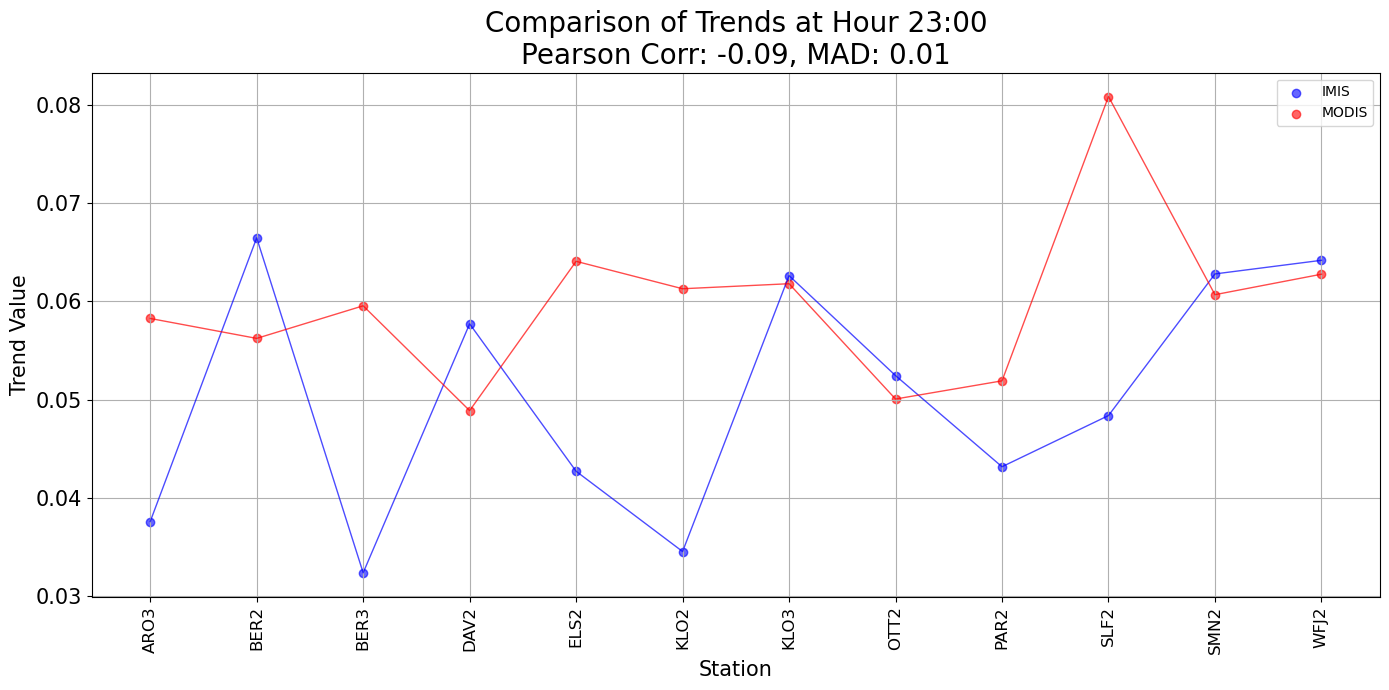

Processing hour: 20:00
Processed IMIS data for hour 20:00:
      Trend Station
0  0.051348    AMD2
1  0.019233    ANV2
2  0.015083    ANV3
3  0.045838    ARO2
4  0.031002    ARO3


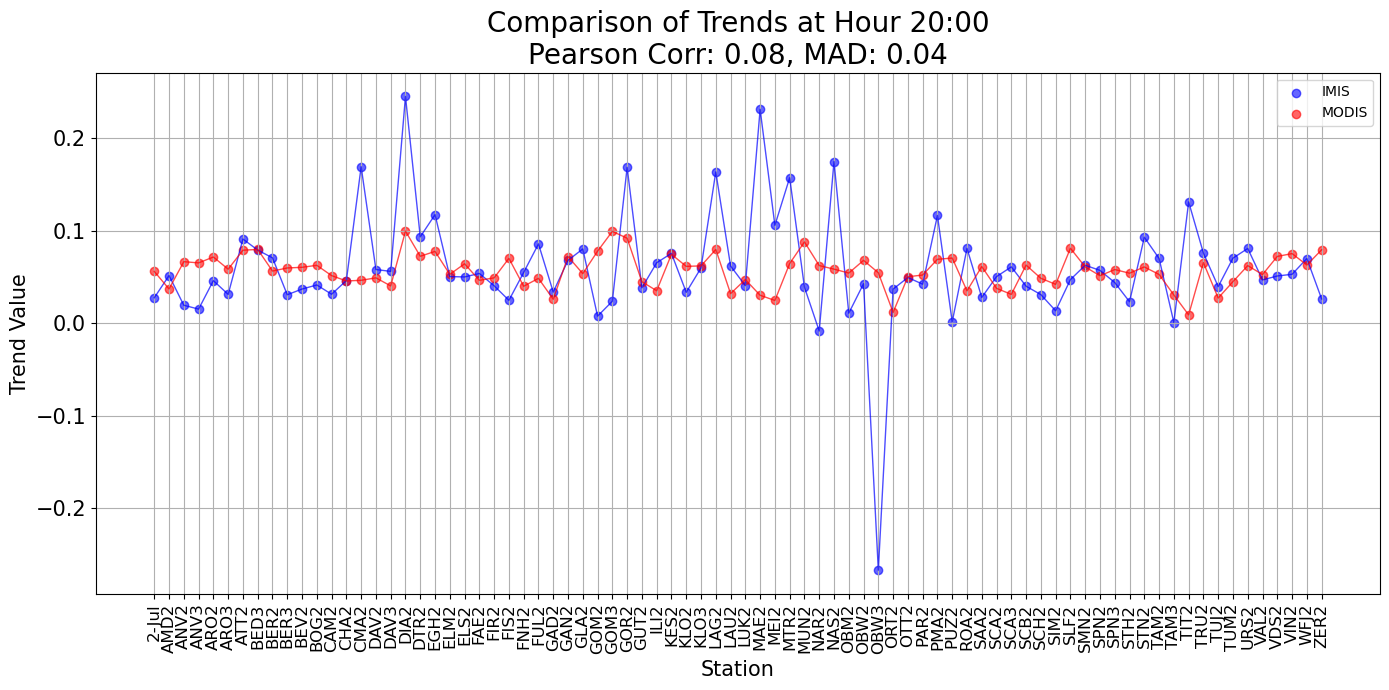

Processing hour: 21:00
Processed IMIS data for hour 21:00:
      Trend Station
0  0.053482    AMD2
1  0.016007    ANV2
2  0.020197    ANV3
3  0.048692    ARO2
4  0.034343    ARO3


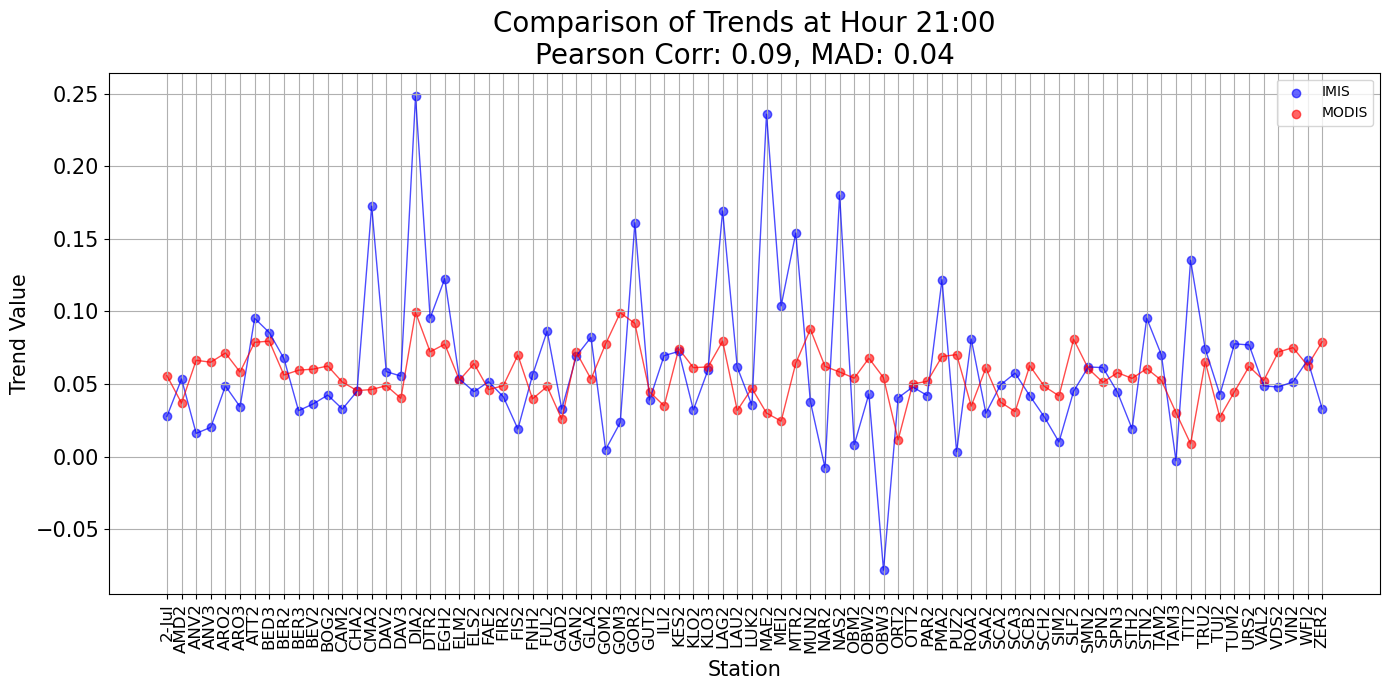

Processing hour: 22:00
Processed IMIS data for hour 22:00:
      Trend Station
0  0.053340    AMD2
1  0.015975    ANV2
2  0.020641    ANV3
3  0.045152    ARO2
4  0.037335    ARO3


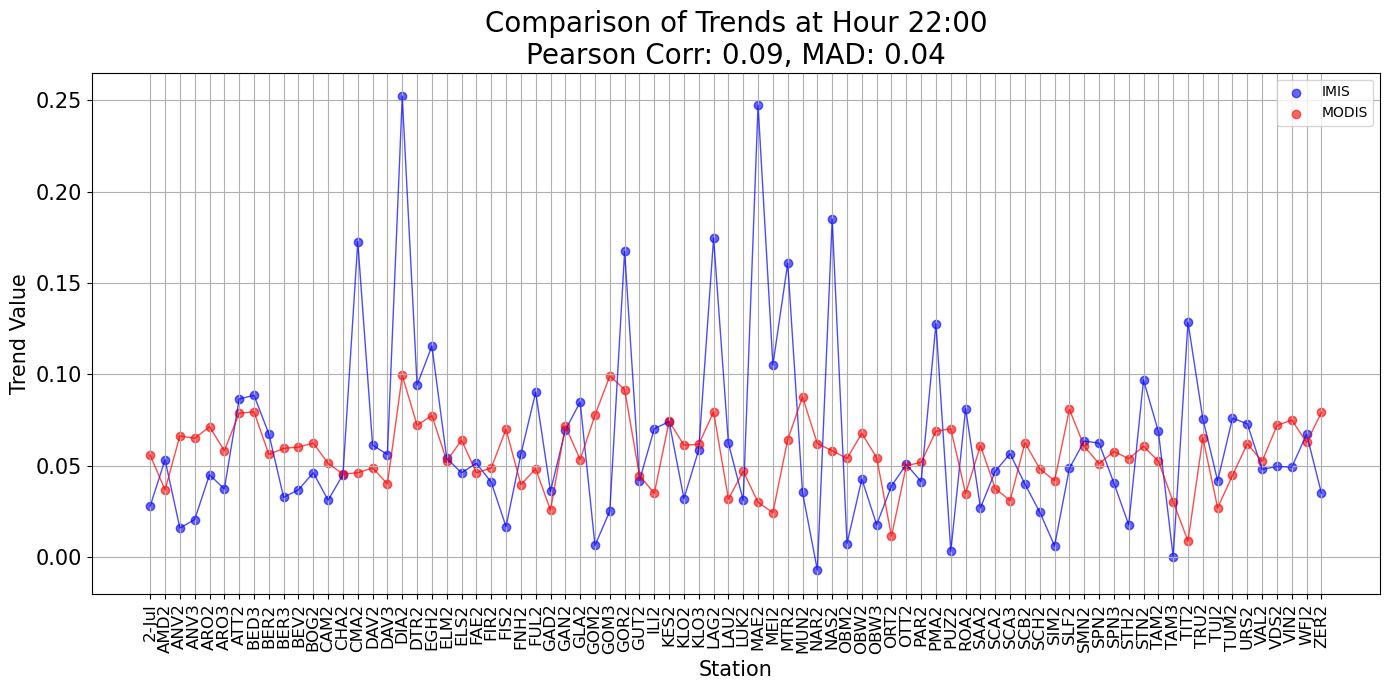

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, linregress

# Paths to the IMIS and MODIS trend data
imis_path = r'E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\new_hourly_trends_new_code.csv'
modis_path = r'E:\all folders\STUDIES\UZH\master thesis\MODIS DATA\Actual Data\MOD21A1N\Filtered_Data\mean_temperature_trends_by_hour.csv'

# Load the data from both files
imis_data = pd.read_csv(imis_path)
modis_data = pd.read_csv(modis_path)

# Convert 'Hour' in MODIS data to match the format in IMIS columns (e.g., '0:00')
modis_data['Hour'] = modis_data['Hour'].apply(lambda x: f"{int(x):02}:00")

# Verify common hours between the datasets
common_hours = set(modis_data['Hour'].unique()) & set(imis_data.columns)
print("Common hours between IMIS and MODIS data:", common_hours)

# Iterate through each common hour to create individual figures
for hour in common_hours:
    print(f"Processing hour: {hour}")

    # Extract IMIS data for the current hour
    current_hour_imis = imis_data[['Time', hour]].copy()
    if 'Time' in current_hour_imis[hour].values:
        print(f"Warning: 'Time' found in the data for hour {hour}")
        current_hour_imis = current_hour_imis[current_hour_imis[hour] != 'Time']
    current_hour_imis = current_hour_imis.rename(columns={hour: 'Trend'})
    current_hour_imis['Station'] = current_hour_imis['Time']
    current_hour_imis = current_hour_imis.drop(columns=['Time'])

    # Verify the processed data for this hour
    print(f"Processed IMIS data for hour {hour}:")
    print(current_hour_imis.head())

    # Filter MODIS data for the current hour
    current_hour_modis = modis_data[modis_data['Hour'] == hour][['Station', 'SlopePerYear']]
    current_hour_modis = current_hour_modis.rename(columns={'SlopePerYear': 'Trend'})

    # Merge the IMIS and MODIS data based on the station name
    merged_data = pd.merge(current_hour_imis, current_hour_modis, on='Station', suffixes=('_IMIS', '_MODIS'), how='outer')

    # Filter out rows with NaN values in either column for Pearson correlation and MAD
    valid_data = merged_data.dropna(subset=['Trend_IMIS', 'Trend_MODIS'])

    if not valid_data.empty:
        # Calculate Pearson correlation and MAD
        pearson_corr, _ = pearsonr(valid_data['Trend_IMIS'], valid_data['Trend_MODIS'])
        mad = np.mean(np.abs(valid_data['Trend_IMIS'] - valid_data['Trend_MODIS']))

        # Calculate the linear regression slope
        slope, intercept = linregress(valid_data['Trend_IMIS'], valid_data['Trend_MODIS'])[:2]

        # Sort data by 'Station' for connecting points smoothly
        valid_data = valid_data.sort_values(by='Station')

        # Create the plot
        plt.figure(figsize=(14, 7))

        # Plot IMIS data with scatter and line
        plt.scatter(valid_data['Station'], valid_data['Trend_IMIS'], color='blue', label='IMIS', alpha=0.6)
        plt.plot(valid_data['Station'], valid_data['Trend_IMIS'], color='blue', linestyle='-', linewidth=1, alpha=0.7)

        # Plot MODIS data with scatter and line
        plt.scatter(valid_data['Station'], valid_data['Trend_MODIS'], color='red', label='MODIS', alpha=0.6)
        plt.plot(valid_data['Station'], valid_data['Trend_MODIS'], color='red', linestyle='-', linewidth=1, alpha=0.7)

        # Add labels, title, and correlation/MAD text
        plt.xlabel('Station',fontsize=15)
        plt.ylabel('Trend Value',fontsize=15)
        plt.title(f'Comparison of Trends at Hour {hour}\nPearson Corr: {pearson_corr:.2f}, MAD: {mad:.2f}',fontsize=20)

        

        plt.xticks(rotation=90,fontsize=12)
        plt.yticks(fontsize=15)
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.tight_layout()

        # Save the figure
        plt.savefig(f'comparison_hour_{hour}.png')
        plt.show()
    else:
        print(f"No valid data available for hour {hour}")


Common hours between IMIS and MODIS data: {'2:00', '1:00', '3:00'}
MODIS hours: ['1:00' '2:00' '3:00']
IMIS hours: ['0:00', '0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00', '4:30', '5:00', '5:30', '6:00', '6:30', '7:00', '7:30', '8:00', '8:30', '9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30']
Processing hour: 2:00
Processed IMIS data for hour 2:00:
      Trend Station
0  0.055448    AMD2
1  0.011894    ANV2
2  0.024836    ANV3
3  0.045483    ARO2
4  0.036425    ARO3


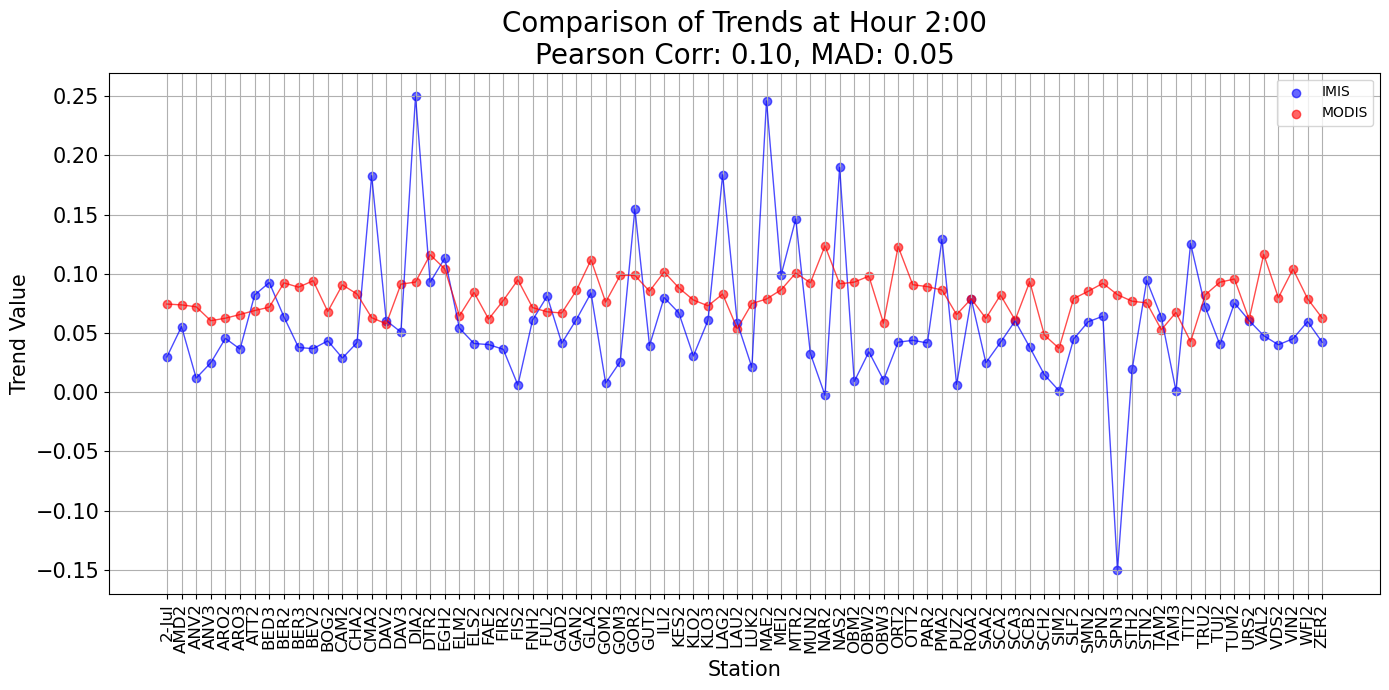

Processing hour: 1:00
Processed IMIS data for hour 1:00:
      Trend Station
0  0.055436    AMD2
1  0.015804    ANV2
2  0.024114    ANV3
3  0.043802    ARO2
4  0.035992    ARO3


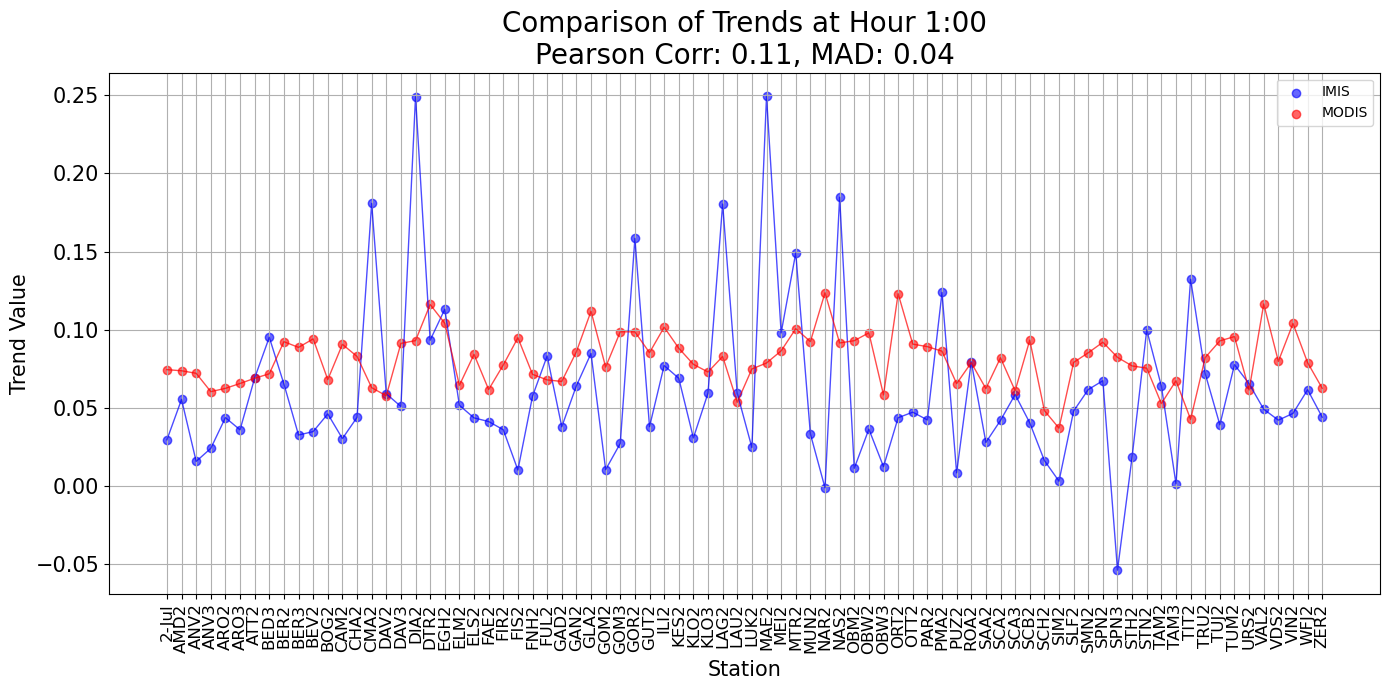

Processing hour: 3:00
Processed IMIS data for hour 3:00:
      Trend Station
0  0.053900    AMD2
1  0.012932    ANV2
2  0.026521    ANV3
3  0.046069    ARO2
4  0.038236    ARO3


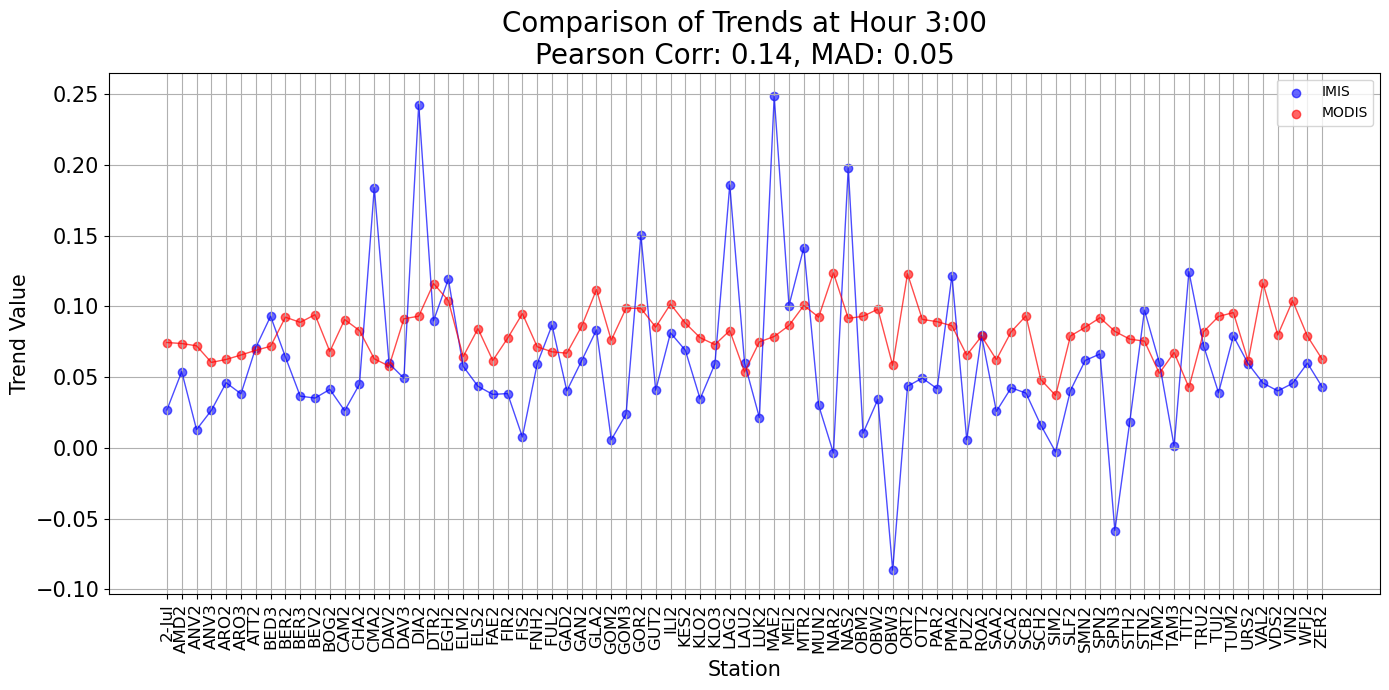

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, linregress

# Paths to the IMIS and MODIS trend data
imis_path = r'E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\new_hourly_trends_new_code.csv'
modis_path = r'E:\all folders\STUDIES\UZH\master thesis\MODIS DATA\Actual Data\MYD21A1N\Filtered_Data\mean_temperature_trends_by_hour.csv'

# Load the data from both files
imis_data = pd.read_csv(imis_path)
modis_data = pd.read_csv(modis_path)



# Ensure MODIS 'Hour' column is converted to strings and formatted to HH:MM
modis_data['Hour'] = modis_data['Hour'].astype(str) + ':00'



# Normalize IMIS column headers to HH:MM format
imis_data.columns = [
    col[:5] if col[:2].isdigit() and ':' in col else col  # Keep only HH:MM for time columns
    for col in imis_data.columns
]

# Find common hours between MODIS and IMIS
common_hours = set(modis_data['Hour'].unique()) & set(imis_data.columns)
print("Common hours between IMIS and MODIS data:", common_hours)

# Debugging: Print out the hours after normalization
print("MODIS hours:", modis_data['Hour'].unique())
print("IMIS hours:", [col for col in imis_data.columns if ':' in col])



# Iterate through each common hour to create individual figures
for hour in common_hours:
    print(f"Processing hour: {hour}")

    # Extract IMIS data for the current hour
    current_hour_imis = imis_data[['Time', hour]].copy()
    if 'Time' in current_hour_imis[hour].values:
        print(f"Warning: 'Time' found in the data for hour {hour}")
        current_hour_imis = current_hour_imis[current_hour_imis[hour] != 'Time']
    current_hour_imis = current_hour_imis.rename(columns={hour: 'Trend'})
    current_hour_imis['Station'] = current_hour_imis['Time']
    current_hour_imis = current_hour_imis.drop(columns=['Time'])

    # Verify the processed data for this hour
    print(f"Processed IMIS data for hour {hour}:")
    print(current_hour_imis.head())

    # Filter MODIS data for the current hour
    current_hour_modis = modis_data[modis_data['Hour'] == hour][['Station', 'SlopePerYear']]
    current_hour_modis = current_hour_modis.rename(columns={'SlopePerYear': 'Trend'})

    # Merge the IMIS and MODIS data based on the station name
    merged_data = pd.merge(current_hour_imis, current_hour_modis, on='Station', suffixes=('_IMIS', '_MODIS'), how='outer')

    # Filter out rows with NaN values in either column for Pearson correlation and MAD
    valid_data = merged_data.dropna(subset=['Trend_IMIS', 'Trend_MODIS'])

    if not valid_data.empty:
        # Calculate Pearson correlation and MAD
        pearson_corr, _ = pearsonr(valid_data['Trend_IMIS'], valid_data['Trend_MODIS'])
        mad = np.mean(np.abs(valid_data['Trend_IMIS'] - valid_data['Trend_MODIS']))

        # Calculate the linear regression slope
        slope, intercept = linregress(valid_data['Trend_IMIS'], valid_data['Trend_MODIS'])[:2]

        # Sort data by 'Station' for connecting points smoothly
        valid_data = valid_data.sort_values(by='Station')

        # Create the plot
        plt.figure(figsize=(14, 7))

        # Plot IMIS data with scatter and line
        plt.scatter(valid_data['Station'], valid_data['Trend_IMIS'], color='blue', label='IMIS', alpha=0.6)
        plt.plot(valid_data['Station'], valid_data['Trend_IMIS'], color='blue', linestyle='-', linewidth=1, alpha=0.7)

        # Plot MODIS data with scatter and line
        plt.scatter(valid_data['Station'], valid_data['Trend_MODIS'], color='red', label='MODIS', alpha=0.6)
        plt.plot(valid_data['Station'], valid_data['Trend_MODIS'], color='red', linestyle='-', linewidth=1, alpha=0.7)

        # Add labels, title, and correlation/MAD text
        plt.xlabel('Station', fontsize=15)
        plt.ylabel('Trend Value', fontsize=15)
        plt.title(f'Comparison of Trends at Hour {hour}\nPearson Corr: {pearson_corr:.2f}, MAD: {mad:.2f}', fontsize=20)

        plt.xticks(rotation=90, fontsize=12)
        plt.yticks(fontsize=15)
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.tight_layout()

        # Save the figure
        plt.savefig(f'comparison_hour_{hour}.png')
        plt.show()
    else:
        print(f"No valid data available for hour {hour}")
